###Setting Environment

In [4]:
#imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
#fetch the datset
#!unzip /content/drive/MyDrive/Dataset/Telco-Customer-Churn.zip

### EDA and Cleaning

####Dataframe Overview

In [6]:
DATA_PATH = "/content/drive/MyDrive/Dataset/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
df.shape

#there are 7043 entries 
# and 21 columns

(7043, 21)

In [7]:
#see contents
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####Target Variable

In [10]:
#check distribution of target
df["Churn"].value_counts()

# Approx 25% customers are likely to churn while 75% continue with the service
#distribution is uneven, sampling is required (later)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
#update churn values [Yes,No] to numeric [0,1]
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

####Features 

Customer ID is irrevelant, we will figure out impact of other features.

In [12]:
#customerID is not helpful in Analysis
df.drop(['customerID'], axis=1, inplace=True)

In [13]:
#shape of every feature (#values or classes)
for col in df.columns:
  print(df[col].name, df[col].value_counts().shape )

gender (2,)
SeniorCitizen (2,)
Partner (2,)
Dependents (2,)
tenure (73,)
PhoneService (2,)
MultipleLines (3,)
InternetService (3,)
OnlineSecurity (3,)
OnlineBackup (3,)
DeviceProtection (3,)
TechSupport (3,)
StreamingTV (3,)
StreamingMovies (3,)
Contract (3,)
PaperlessBilling (2,)
PaymentMethod (4,)
MonthlyCharges (1585,)
TotalCharges (6531,)
Churn (2,)


##### Binary Features

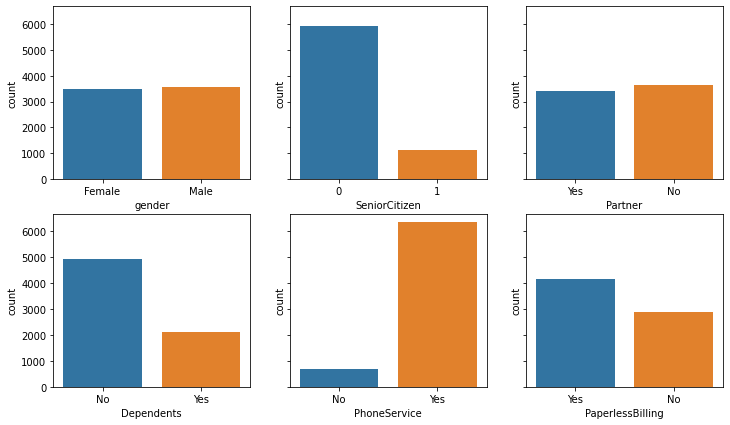

In [14]:
#check the distribution of binary variables
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
bi_var = set()
i,j = 0,0
for col in df.columns:
  if df[col].value_counts().shape[0]==2 and df[col].name != 'Churn':
    if j > 2 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    sns.countplot(df[col].name, data=df, ax=axes[i, j])
    bi_var.add(df[col].name)
    j = j + 1

We have 6 Binary Features - Gender, Senior Citizen, Dependents, Partner, Phone Service, Paperless Billng.


From the graphs, we observe that there is
High data imbalance in SeniorCitizen and PhoneService features

i.e. there are very few customers without PhoneService, many customers have phone services.

and there are few customers who are SeniorCitizen, more number of young customers in the data.


In [15]:
#check for effect of binary variables on target var - CHURN

for feature in bi_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby([feature]).mean()
  print(mean)

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
           Churn
gender          
Female  0.269209
Male    0.261603
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


From above data, we realize that there is no impact of gender on churn since the effect is equal.

Similary phone service can be avoided if 2% difference is trivial

In [16]:
#method 2 to calculate the mean of various features
pd.pivot_table(df, values='Churn', index=['gender'], columns=["Dependents", "Partner"], aggfunc=np.mean)


Dependents        No                 Yes          
Partner           No       Yes        No       Yes
gender                                            
Female      0.354683  0.232298  0.227586  0.149490
Male        0.329846  0.274764  0.203704  0.135104

#####Multivariate features

For Payment feature, the labels are too wordy, so we refine the words for better understanding.

In [17]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)


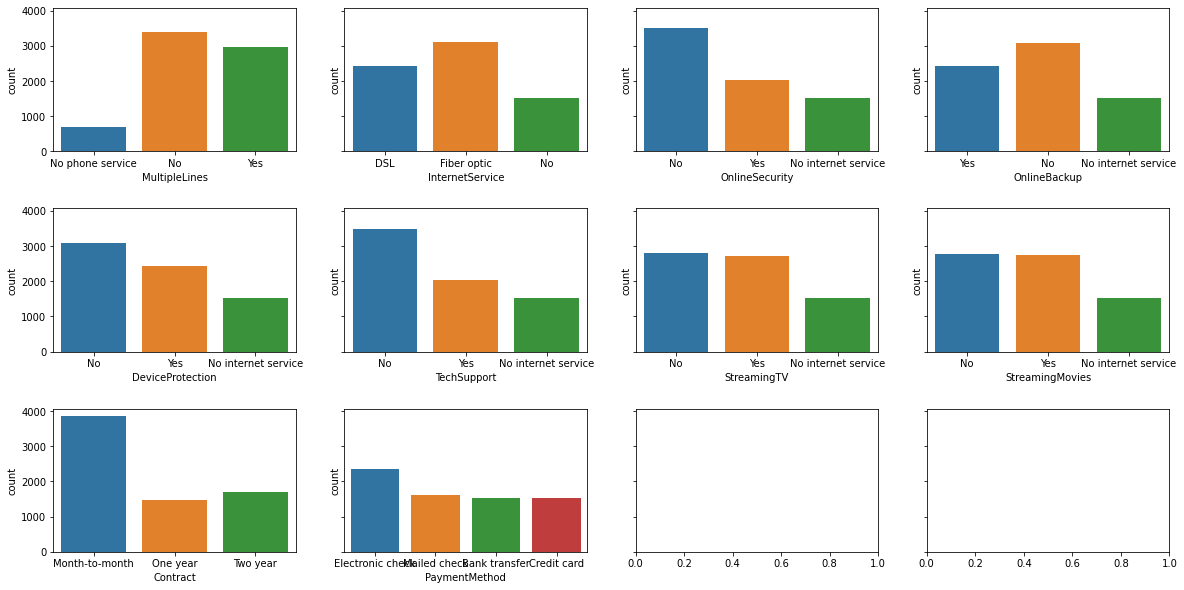

In [19]:
#check the distribution of multivariate variables ( > 2 )
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 4, figsize=(20,10), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
mul_var = set()
i,j = 0,0
for col in df.columns:
  if df[col].value_counts().shape[0] in [3,4] :
    if j >3 :
      j = 0
      i = i + 1
    #print(df[col].name, i,j)
    sns.countplot(df[col].name, data=df, ax=axes[i, j])
    
    mul_var.add(df[col].name)
    j = j + 1

In [20]:
for feature in mul_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby([feature]).mean()
  print(mean)

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663
                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                     Churn
PaymentMethod             
Bank transfer     0.167098
Credit card       0.152431
Electronic check  0.452854
Mailed check      0.191067
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes

Multiple Lines feature do not have significant importance, as percentage of churn for all classes is nearly equal.

Customers with 'Electronic Check Payment' are more likely to churn.

Customers with 'Fiber Optics' are more likely to churn.

Customers with 'No Streaming Movies' are more likely to churn.

Customers with 'No Online Security' are more likely to churn.

Customers with 'No Tech Support' are more likely to churn.

Customers with 'Monthly contract' are more likely to churn.

Customers with 'No Device protection' are more likely to churn.

Customers with 'No Online Back Up' are more likely to churn.


#####Continuous Features

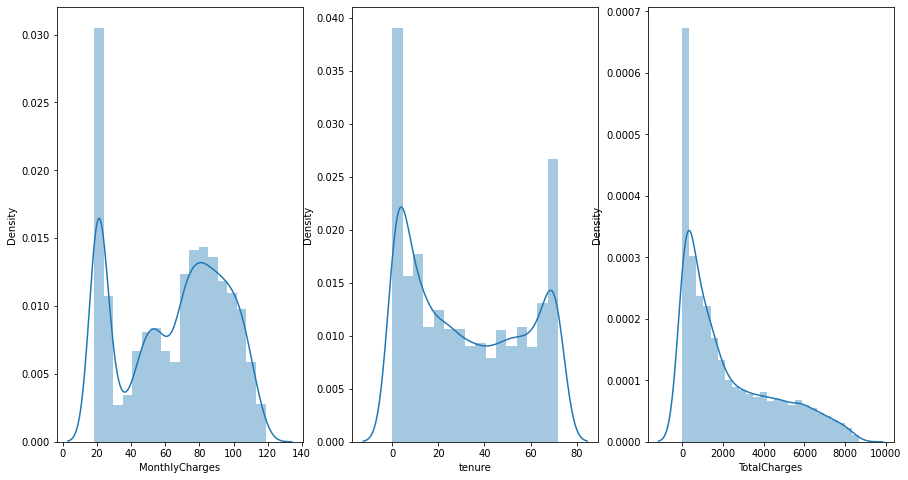

In [21]:
#Continuous variables : [3] : "MonthlyCharges",  "tenure", "TotalCharges"

#Total charges = Monthly Charge x Tenure  Thus ignore
#If using ^, convert Total Charges (object) into float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0.0)

conti_var = ["MonthlyCharges",  "tenure", "TotalCharges"]
fig, axes = plt.subplots(1,3, figsize=(15, 8))
i=0
for var in conti_var :
  sns.distplot(df[var], ax=axes[i])
  i = i+1

In [22]:
for feature in conti_var:
  #pd.pivot_table(df, values='Churn', index=[feature], aggfunc=np.mean)
  mean = df[[feature,'Churn']].groupby(['Churn']).mean()
  print(mean)

#mean = df[["MonthlyCharges","tenure",'Churn']].groupby(['Churn']).mean()

       MonthlyCharges
Churn                
0           61.265124
1           74.441332
          tenure
Churn           
0      37.569965
1      17.979133
       TotalCharges
Churn              
0       2549.911442
1       1531.796094


Customers who are likely to leave (churn = 1) compared to churn = 0:

those with higher monthly charges 

those with lesser tenure (new customers)

those with lower total charges

#### Feature Importance 
Correlation of Features wrt Target Variable

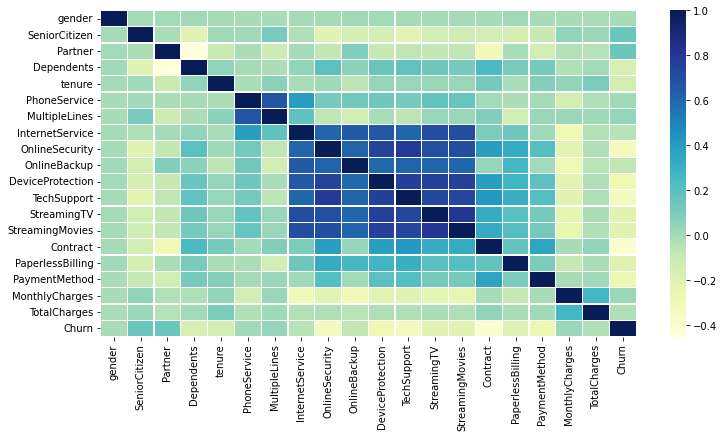

In [23]:
#HeatMap
plt.figure(figsize=(12, 6))
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

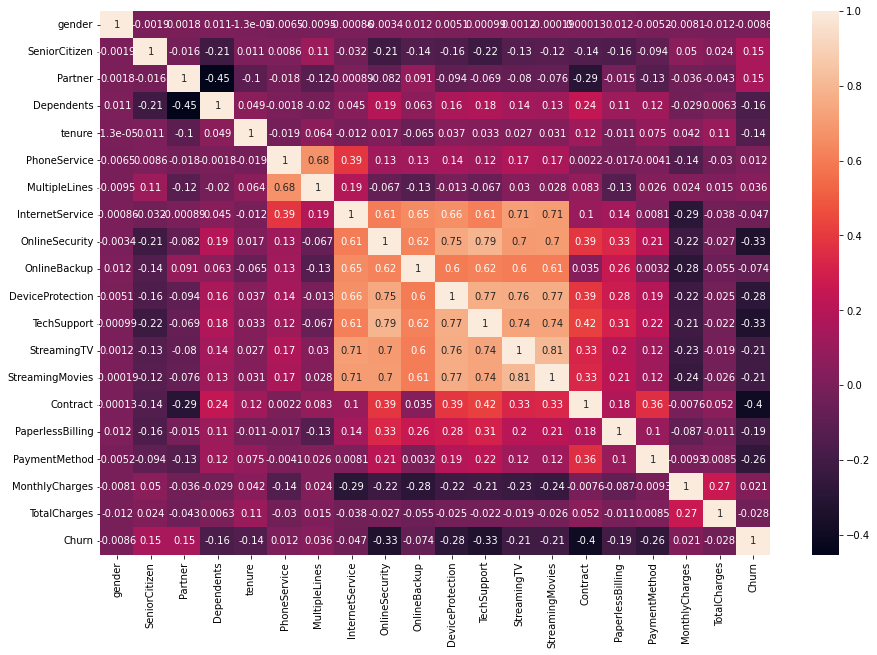

In [24]:
#Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

In [25]:
from sklearn.metrics import mutual_info_score
cat_var = df.select_dtypes(include=object)
print(cat_var.columns)

def calc_mutual_info(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

feature_imp = cat_var.apply(calc_mutual_info).sort_values(ascending=False)
print(feature_imp)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


Mutual Info score calculates degree of dependency between feature and response variable. Higher the score, greater is the predictive power of feature in estimating the target.

From above values, we can see that MultipleLines, PhoneService and gender have score close to zero, thus they do not have strong relationship with the target. Therfore, they can be ignored.

####Categorical Features

#####Label Encoding
We use it for Binary Variables

In [26]:
df_new1 = df.copy()

print("Binary Features : ",bi_var)
for var in bi_var :
    if var == 'gender':
        df_new1[var] = df_new1[var].map({'Female': 1, 'Male': 0})
    elif (var not in ['SeniorCitizen']): 
        df_new1[var] = df_new1[var].map({'Yes': 1, 'No': 0}) 

print(df_new1.head(5))

Binary Features :  {'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'gender', 'PaperlessBilling'}
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies    

##### OneHot Encoding



In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cat_features = ['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaymentMethod',  'PaperlessBilling', 'Contract']

df_new = pd.get_dummies(df_new1, columns=cat_features, drop_first=True)
df_new.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_1,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,29.85,29.85,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,56.95,1889.50,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,53.85,108.15,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,42.30,1840.75,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,2,1,70.70,151.65,1,0,...,0,0,0,0,0,1,0,1,0,0


#### Normalization

In [28]:
sc = MinMaxScaler()
tenure_sc = sc.fit_transform(df[['tenure']])
monthlycharge_sc = sc.fit_transform(df[['MonthlyCharges']])
totalcharge_sc = sc.fit_transform(df[['TotalCharges']])

df_new['tenure'] = tenure_sc
df_new['MonthlyCharges'] = monthlycharge_sc
df_new['TotalCharges'] = totalcharge_sc


###Custom MixMaxScalar Function
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
def min_max_scaler_fn (dframe, columns):
  for col in columns :
    min_column = dframe[col].min()
    max_column = dframe[col].max()
    dframe
    [col] = (dframe[col] - min_column) / (max_column - min_column) 

#min_max_scaler_fn (df_new, columns):

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7043 non-null   int64  
 1   SeniorCitizen                         7043 non-null   int64  
 2   Partner                               7043 non-null   int64  
 3   Dependents                            7043 non-null   int64  
 4   tenure                                7043 non-null   float64
 5   PhoneService                          7043 non-null   int64  
 6   MonthlyCharges                        7043 non-null   float64
 7   TotalCharges                          7043 non-null   float64
 8   Churn                                 7043 non-null   int64  
 9   MultipleLines_No phone service        7043 non-null   uint8  
 10  MultipleLines_Yes                     7043 non-null   uint8  
 11  InternetService_F

####Resampling

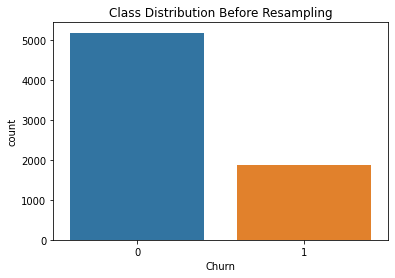

yes_initial 1869
yes_upsample 5174


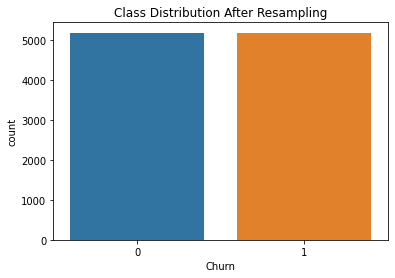

In [30]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')
plt.show()

X_no = df_new[df_new.Churn == 0]
X_yes = df_new[df_new.Churn == 1]
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print("yes_initial",len(X_yes))
print("yes_upsample",len(X_yes_upsampled))

df_up = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=df_up).set_title('Class Distribution After Resampling')
plt.show()

In [31]:
print("Intitial", df_new.shape)
print("Upsampled", df_up.shape)

Intitial (7043, 31)
Upsampled (10348, 31)


### DATA SPLIT : Train Test 

In [32]:
from sklearn.model_selection import train_test_split 

#Split train : test -> 75% : 25% 
X = df_up.drop(columns='Churn')
y = df_up.loc[:, 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)
print("train", len(X_train), len(y_train), "\ntest ", len(X_test), len(y_test))

train 7761 7761 
test  2587 2587


In [33]:
#saving train test data
import pickle
filename = ['trainX.sav', 'trainY.sav', 'testX.sav', 'testY.sav']
pickle.dump(X_train, open(filename[0], 'wb'))
pickle.dump(y_train, open(filename[1], 'wb'))
pickle.dump(X_test, open(filename[2], 'wb'))
pickle.dump(y_test, open(filename[3], 'wb'))